In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense, Convolution1D

In [2]:
df = pd.read_csv('./pamap_features.csv', index_col=0)

In [3]:
df

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,100.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,100.0,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,100.0,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,100.0,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,9
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,9
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,9


In [4]:
drop_list = []
imu_parts = ['hand', 'chest', 'ankle']
imu_dat = ['Acc16_', 'Gyro', 'Magne']

for i in imu_parts:
    for j in range(1, 4):
        drop_list.append(f'{i}Acc6_{j}')

print(df.keys())

df = df.drop(drop_list, axis=1)

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id'],
      dtype=

In [5]:
feats = []

for i in imu_parts:
    for j in imu_dat:
        for k in range(1, 4):
            feats.append(f'{i}{j}{k}')

print(feats)

['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2', 'chestMagne3', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3']


<Axes: title={'center': 'Count Rows of activityIDs'}>

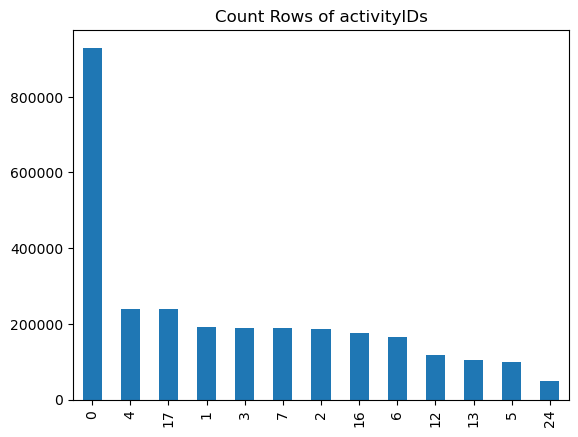

In [6]:
df['activityID'].value_counts().plot(kind='bar', title='Count Rows of activityIDs')
# 0 - transient activities (일시적인 활동)

In [18]:
X = df[feats]

X_scaled = pd.DataFrame(data = X, columns=feats)
y = df['activityID']

y.value_counts()

0     929661
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: activityID, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, shuffle=False, random_state=21
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2154399, 27) (718134, 27) (2154399,) (718134,)


In [9]:
TIME_PERIOD = 80
STEP_DISTANCE = 40

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2154399, 27) (2154399,)
(718134, 27) (718134,)


In [10]:
unique, counts = np.unique(y_train, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(y_test, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T) 

Train data label statistics::
[[     0 708659]
 [     1 146884]
 [     2 149983]
 [     3 139020]
 [     4 173508]
 [     5  77975]
 [     6 116445]
 [     7 130494]
 [    12  87887]
 [    13  83671]
 [    16 129509]
 [    17 176201]
 [    24  34163]]
Test data label statistics::
[[     0 221002]
 [     1  45639]
 [     2  35205]
 [     3  50911]
 [     4  65253]
 [     5  20224]
 [     6  48155]
 [     7  57613]
 [    12  29329]
 [    13  21273]
 [    16  45844]
 [    17  62489]
 [    24  15197]]


In [11]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []

    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i : (i + time_steps)].values
        labels = y.iloc[i : i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])

    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEP = 80
STEP = 40

X_train, y_train = create_dataset(X_train[feats], y_train, TIME_STEP, STEP)
X_test, y_test = create_dataset(X_test[feats], y_test, TIME_STEP, STEP)

print(X_train.shape, y_train.shape) 

(53858, 80, 27) (53858, 1)


In [12]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(53858, 80, 27) (53858, 1) (17952, 80, 27) (17952, 1)


In [13]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

/Users/kimtaeyoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Bidirectional, LSTM
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical

In [15]:
verbose, epochs, batch_size = 1, 10, 32

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

n_timesteps, n_features, n_outputs

(80, 27, 13)

In [16]:
model = Sequential([
    Bidirectional(LSTM(units=128, input_shape=[X_train.shape[1], X_train.shape[2]])),
    Dropout(rate=0.5),
    Dense(units=128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1, shuffle=True)

print(model.summary())

 583/1515 [==========>...................] - ETA: 2:19 - loss: nan - acc: 0.3205

KeyboardInterrupt: 

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()